In [ ]:
run pyabc_calib.py

INFO:Sampler:Parallelizing the sampling on 12 cores.
INFO:History:Start <ABCSMC(id=56, start_time=2020-12-17 04:12:51.247046, end_time=None)>
INFO:ABC:Calibration sample before t=0.
INFO:Epsilon:initial epsilon is 111.68928087688147
INFO:ABC:t: 0, eps: 111.68928087688147.
INFO:ABC:Acceptance rate: 15 / 29 = 5.1724e-01, ESS=1.5000e+01.
INFO:ABC:t: 1, eps: 80.81376048574617.


In [17]:
history.get_distribution()

(name   annual_variance  fertility_prop  harvest_adj  household_need  \
 id                                                                    
 28619         0.433691        0.317168     0.338045      707.216188   
 28620         0.264123        0.214395     0.306272      714.868857   
 28621         0.461492        0.192723     0.210952      714.457774   
 28622         0.257232        0.214317     0.330720      714.124653   
 28623         0.355556        0.400512     0.436051      702.145813   
 ...                ...             ...          ...             ...   
 28714         0.129147        0.168780     0.319313      717.962495   
 28715         0.238331        0.202170     0.289799      715.819678   
 28716         0.290551        0.163923     0.237664      717.183000   
 28717         0.314811        0.232264     0.290567      714.100999   
 28718         0.200650        0.168225     0.315555      717.762107   
 
 name   initial_max  initial_min  max_death  max_distance  max

10


TypeError: plot_kde_1d() missing 1 required positional argument: 'x'

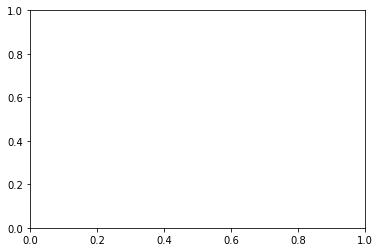

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
print(history.max_t+1)
for t in range(history.max_t+1):
    df, w = history.get_distribution(m=0, t=t)
    pyabc.visualization.plot_kde_1d(
        df, w,
        xmin=0, xmax=5,
        x="min_death", ax=ax,
        label="PDF t={}".format(t))
ax.axvline(color="k", linestyle="dashed");
ax.legend();

In [14]:
history.get_weighted_distances()

,distance,w
0,113.916278,0.000078
1,113.933188,0.000008
2,113.933188,0.086251
3,113.933188,0.000020
4,113.901763,0.021254
...,...,...
95,113.933188,0.000271
96,113.933188,0.000153
97,113.933188,0.002782
98,113.933188,0.000070


In [15]:
history.get_all_populations()

,t,population_end_time,samples,epsilon,particles
0,-1,2020-12-16 16:28:38.941160,100,inf,1
1,0,2020-12-16 16:34:24.885537,111,113.933188,100
2,1,2020-12-16 16:37:14.646027,111,113.933188,100
3,2,2020-12-16 16:40:05.518305,111,113.933188,100
4,3,2020-12-16 16:43:08.682985,111,113.933188,100
5,4,2020-12-16 16:45:42.820327,111,113.933188,100
6,5,2020-12-16 16:48:27.670711,111,113.933188,100
7,6,2020-12-16 16:51:06.877559,111,113.933188,100
8,7,2020-12-16 16:54:21.883083,111,113.933188,100
9,8,2020-12-16 16:56:57.514236,111,113.933188,100


In [16]:
history.get_model_probabilities()

m,0
t,
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0


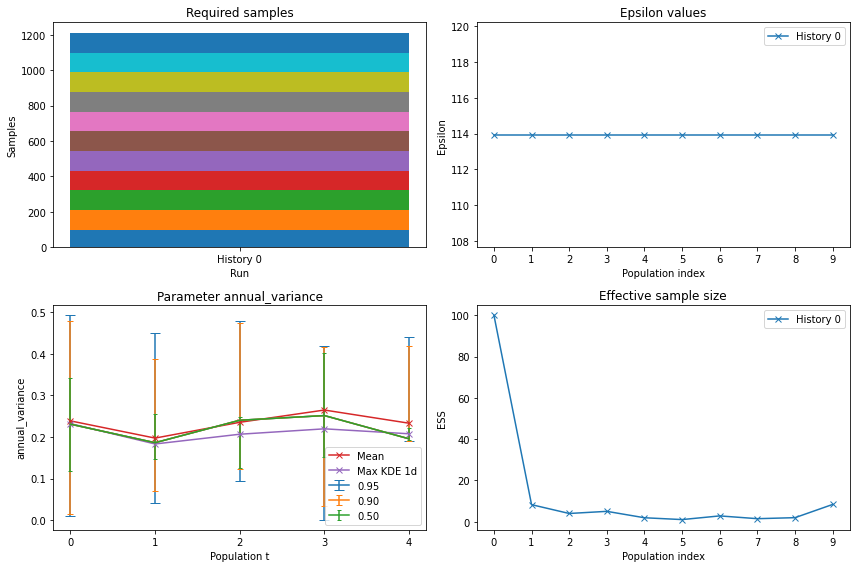

In [25]:
_, arr_ax = plt.subplots(2, 2)

pyabc.visualization.plot_sample_numbers(history, ax=arr_ax[0][0])
pyabc.visualization.plot_epsilons(history, ax=arr_ax[0][1])
pyabc.visualization.plot_credible_intervals(
    history, levels=[0.95, 0.9, 0.5], ts=[0, 1, 2, 3, 4],
    show_mean=True, show_kde_max_1d=True, arr_ax=arr_ax[1][0])
pyabc.visualization.plot_effective_sample_sizes(history, ax=arr_ax[1][1])

plt.gcf().set_size_inches((12, 8))
plt.gcf().tight_layout()

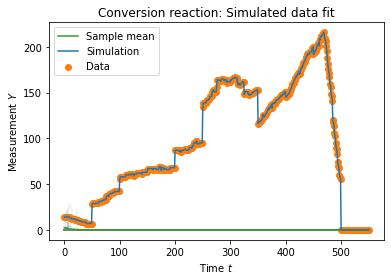

In [36]:
from pyabc.visualization import plot_kde_2d, plot_data_callback

_, ax = plt.subplots()
measurement_times = np.arange(len(target_data))
def plot_data(sum_stat, weight, ax, **kwargs):
    """Plot a single trajectory"""
    ax.plot(measurement_times, sum_stat['population'], color='grey', alpha=0.1)

def plot_mean(sum_stats, weights, ax, **kwargs):
    """Plot mean over all samples"""
    weights = np.array(weights)
    weights /= weights.sum()
    data = np.array([sum_stat['population'] for sum_stat in sum_stats])
    mean = (data * weights.reshape((-1, 1))).sum(axis=0)
    ax.plot(measurement_times, mean, color='C2', label='Sample mean')

ax = plot_data_callback(history, plot_data, plot_mean, ax=ax)

plt.plot(target_data, color="C0", label='Simulation')
plt.scatter(measurement_times, target_data,
            color="C1", label='Data')
plt.xlabel('Time $t$')
plt.ylabel('Measurement $Y$')
plt.title('Conversion reaction: Simulated data fit')
plt.legend()
plt.show()